<a href="https://colab.research.google.com/github/godlygodzilla/nn_and_dl/blob/main/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


label: 9
image: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 188 146  79   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 202 199 255 144   0   0   0   0  11 135 157   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 200 187 200 191 255  51   0   0  16 208 227 236  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0  18 233 19

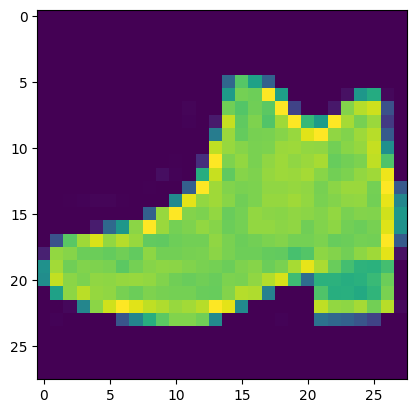

In [ ]:
np.set_printoptions(linewidth=150)

print(f'label: {train_labels[15]}')
print(f'image: {train_images[15]}')
plt.imshow(train_images[15])

In [ ]:
train_images= train_images/255.0
test_images= test_images/255.0

In [ ]:
model_= keras.Sequential([keras.layers.Flatten(),
                         keras.layers.Dense(128,activation=tf.nn.relu),
                         keras.layers.Dense(10,activation=tf.nn.softmax)])

In [ ]:
class my_callbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):

    if (logs.get('loss')<0.4):
      print("\nstopping training")
      self.model.stop_training= True

In [ ]:
callbacks=my_callbacks()

In [ ]:
model_.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_.fit( train_images, train_labels, epochs=10000,callbacks=[callbacks])

Epoch 1/10000
1875/1875 [==============================] - 13s 3ms/step - loss: 0.5000 - accuracy: 0.8242
Epoch 2/10000
1869/1875 [============================>.] - ETA: 0s - loss: 0.3734 - accuracy: 0.8666
stopping training
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.8666


In [ ]:
model_.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3761 - accuracy: 0.8642


[0.3760877251625061, 0.8641999959945679]

In [ ]:
classifications=model_.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.9019943e-05 1.3387663e-07 2.7687845e-05 1.4929358e-06 6.3695825e-06 3.0567570e-02 2.8516122e-05 7.8525051e-02 5.5776857e-04 8.9026636e-01]
